# Problem:
The project aims to analyze job application data collected over a 3-month period, encompassing various parameters such as company name, job post, type of job, location, skills required, compensation (CTC), applied through method, date applied, and additional comments. The dataset consists of 278 entries.

**Note:** This data is exclusively collected from my personal job applications. Any external usage should include proper citation.

**Last updated on:** March 16, 2024

In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Job & Intern Updates - Applied Companies.csv', parse_dates=['DateApplied'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y'))
df.sample(5)

,SR No.,CompanyName,Post,JobID,Type,Location,Skills,CTC,AppliedThrough,Comments,DateApplied,Link1,Link2
86,87,Buddha Education Association Incorporation,Artificial Intelligence (AI),NaN,Internship (1 Months),NaN,"Data Structures, Natural Language Processing (...","₹ 25,000 /month",Internshala,NaN,2024-02-03,https://internshala.com/internship/detail/arti...,NaN
27,28,SKF,Data Analyst,19053,Full-time,Bangalore,"Data Interpretation, Statistical Analysis, Dat...",ND,Offial Website,Yet to apply (sent msg for refferal),2024-01-25,Data Analyst,NaN
0,1,Congnizant,Programmer Analyst,triple zero 56773071,Full-time,Bangalore,NaN,ND,Offial Website,NaN,NaT,https://careers.cognizant.com/in/en/Full-time/...,NaN
71,72,Turing,Data Analyst,NaN,Internship,Remote,English · Analytical Skills · Datasets · Jupyt...,25k/m,LinkedIn (Call-Mail),NaN,2024-02-01,https://www.linkedin.com/jobs/view/3808869213/...,NaN
154,155,Adtitude Digital,Business Analyst,NaN,Full-Time,Remote,"Technology and tools: Slack, SQL, Excel , Tabl...",INR 400K + Performance Bonus,LinkedIn,6:00 PM to 4:00 AM (Night Time IST),2024-02-19,https://www.linkedin.com/jobs/view/3828511091,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SR No.          278 non-null    int64         
 1   CompanyName     233 non-null    object        
 2   Post            233 non-null    object        
 3   JobID           37 non-null     object        
 4   Type            228 non-null    object        
 5   Location        229 non-null    object        
 6   Skills          209 non-null    object        
 7   CTC             231 non-null    object        
 8   AppliedThrough  231 non-null    object        
 9   Comments        16 non-null     object        
 10  DateApplied     206 non-null    datetime64[ns]
 11  Link1           230 non-null    object        
 12  Link2           14 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 28.4+ KB


In [ ]:
df['month'] = df['DateApplied'].dt.month

# Data Cleaning and Preprocessing:

In [ ]:
df.rename(columns = {'SR No.':'SeriealNumber', 'Post':'Job_Role'},inplace = True)
df = df.replace(["ND"], 'Not disclosed')
df.head()

,SeriealNumber,CompanyName,Job_Role,JobID,Type,Location,Skills,CTC,AppliedThrough,Comments,DateApplied,Link1,Link2,month
0,1,Congnizant,Programmer Analyst,triple zero 56773071,Full-time,Bangalore,NaN,Not disclosed,Offial Website,NaN,NaT,https://careers.cognizant.com/in/en/Full-time/...,NaN,NaN
1,2,Congnizant,Programmer Analyst,triple zero 57162692,Full-time,Chennai,NaN,Not disclosed,Offial Website,NaN,NaT,Programmer Analyst Full-time | Cognizant Full-...,NaN,NaN
2,3,Ozibook Tech Solutions Private Limited,Data Analytics,NaN,Internship (part-time),WFH (2 Month),"Jupyter Notebook, Python libraries (Matplotlib...",1000/month,Internshala,NaN,NaT,https://internshala.com/internship/detail/data...,NaN,NaN
3,4,Jivichem Synthesis Private Limited,Machine Learning,NaN,Internship (part-time),WFH (1 Month),"Data Analytics, Data Science, Deep Learning, M...",12000/month,Internshala,NaN,NaT,Machine Learning Remote Part Time Internship a...,NaN,NaN
4,5,Ozibook Tech Solutions Private Limited,Business Analytics,Reason (Skills not suited to me),Internship (part-time),WFH (2 Month),"Google Docs, Google Sheets, Google Drive",1000/month,Internshala,NaN,NaT,https://internshala.com/internship/detail/busi...,NaN,NaN


In [ ]:
df = df.dropna(subset={'CompanyName', 'DateApplied'})
df.tail(3)

,SeriealNumber,CompanyName,Job_Role,JobID,Type,Location,Skills,CTC,AppliedThrough,Comments,DateApplied,Link1,Link2,month
230,231,WCG,Jr. Data & Analytics Engineer,NaN,Full-Time,Remote,"Python, data manipulation and analysis using S...",Not disclosed,Official website,NaN,2024-03-15,https://careers.wcgclinical.com/careers/Folder...,https://www.linkedin.com/jobs/view/3818212303,3.0
231,232,Johnson & Johnson,Data analyst – Commercial Effectiveness,2406174230W,Full-Time,Pune,"Excel, Demonstrated proficiency with Data Scie...",Not disclosed,Official website,NaN,2024-03-15,https://jnjc.taleo.net/careersection/careersec...,NaN,3.0
232,233,Elite Met Solutions,Data Analyst / Analytics,NaN,Full-Time,Chennai,"Advance in SQL and Excel, tableau,power bi, Py...","₹400,000/yr - ₹500,000/yr",LinkedIn,NaN,2024-03-16,https://www.linkedin.com/jobs/view/3859741383,NaN,3.0


In [ ]:
df.isnull().sum()

SeriealNumber       0
CompanyName         0
Job_Role            0
JobID             178
Type                5
Location            4
Skills             19
CTC                 2
AppliedThrough      2
Comments          194
DateApplied         0
Link1               3
Link2             192
month               0
dtype: int64

In [ ]:
df.drop(['JobID','Comments', 'Link2'], axis=1, inplace=True, errors='ignore')
df.sample()

,SeriealNumber,CompanyName,Job_Role,Type,Location,Skills,CTC,AppliedThrough,DateApplied,Link1,month
98,99,Findem,Researcher - Data Operations Intern,Internship (6 Months),Remote,"Excel, Machine learning, Analytics",₹10000/month,Naukri.com,2024-02-04,https://www.naukri.com/job-listings-100124501004,2.0


In [ ]:
# Replacing NaN values with most frequent value
df['CTC'].fillna(value = df['CTC'].mode()[0], inplace=True)
df['Type'].fillna(value = df['Type'].mode()[0], inplace=True)
df['Skills'].fillna(value = df['Skills'].mode()[0], inplace = True)
df['Location'].fillna(value=df['Location'].mode()[0], inplace=True)
df['AppliedThrough'].fillna(value=df['AppliedThrough'].mode()[0],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 27 to 232
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SeriealNumber   206 non-null    int64         
 1   CompanyName     206 non-null    object        
 2   Job_Role        206 non-null    object        
 3   Type            206 non-null    object        
 4   Location        206 non-null    object        
 5   Skills          206 non-null    object        
 6   CTC             206 non-null    object        
 7   AppliedThrough  206 non-null    object        
 8   DateApplied     206 non-null    datetime64[ns]
 9   Link1           203 non-null    object        
 10  month           206 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 19.3+ KB


In [ ]:
df['Job_Role'] = df['Job_Role'].str.lower()
df.sample()

,SeriealNumber,CompanyName,Job_Role,Type,Location,Skills,CTC,AppliedThrough,DateApplied,Link1,month
31,32,Awesome Analytics,data analyst,Full-time,Remote,"Data Analysis, Data Analytics, Microsoft Power...",Not disclosed,LinkedIn (Official website),2024-01-25,https://www.linkedin.com/Full-times/search/?cu...,1.0


# Exploratory Data Analysis (EDA)

## Job Role

In [ ]:
substrings_to_match = ['analysis', 'analyst','analytic','analytics','power bi', 'visualization','architect','mining','operations','operation','intern']
for substring in substrings_to_match:
    df.loc[df['Job_Role'].str.contains(substring),'Job_Role'] = 'Data Analyst'

df.loc[df['Job_Role'].str.contains('artificial'),'Job_Role'] = 'Artificial Inteligence'
df.loc[df['Job_Role'].str.contains('engineer'),'Job_Role'] = 'Data Engineer'

substrings_to_match = ['scientist','science']
for substring in substrings_to_match:
  df.loc[df['Job_Role'].str.contains(substring),'Job_Role'] = 'Data Science'

df['Job_Role'] = df['Job_Role'].replace(["machine learning"], 'Machine Learning')

substrings_to_match = ['development','developer','train']
for substring in substrings_to_match:
  df.loc[df['Job_Role'].str.contains(substring),'Job_Role'] = 'Software Developer'

In [ ]:
df['Job_Role'].unique()

array(['Data Analyst', 'Artificial Inteligence', 'Data Engineer',
       'Data Science', 'Software Developer', 'Machine Learning'],
      dtype=object)

In [ ]:
df['Job_Role'].value_counts()

Data Analyst              172
Data Science               15
Software Developer          8
Data Engineer               6
Artificial Inteligence      3
Machine Learning            2
Name: Job_Role, dtype: int64

Text(0, 0.5, '')

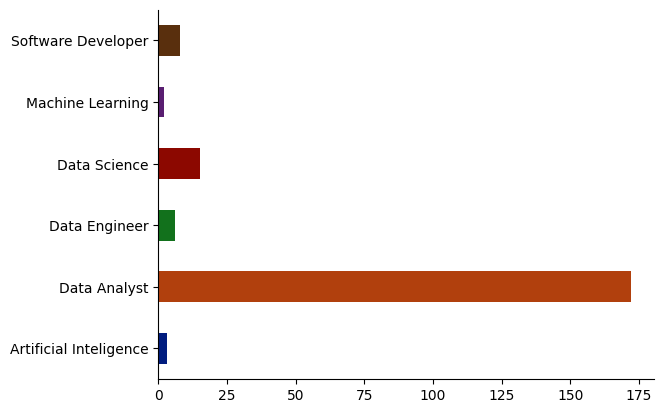

In [ ]:
df.groupby('Job_Role').size().plot(kind='barh', color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Job Type

In [ ]:
df['Type'] = df['Type'].str.lower()
substrings_to_match = ['internship','intern','part-time']
for substring in substrings_to_match:
  df.loc[df['Type'].str.contains(substring),'Type'] = 'Internship'

df.loc[df['Type'].str.contains('full-time'),'Type'] = 'Full-Time'
df.loc[df['Type'].str.contains('contract'),'Type'] = 'Contract'

In [ ]:
df['Type'].unique()

array(['Full-Time', 'Internship', 'Contract'], dtype=object)

In [ ]:
df['Type'].value_counts()

Full-Time     155
Internship     40
Contract       11
Name: Type, dtype: int64

Text(0, 0.5, '')

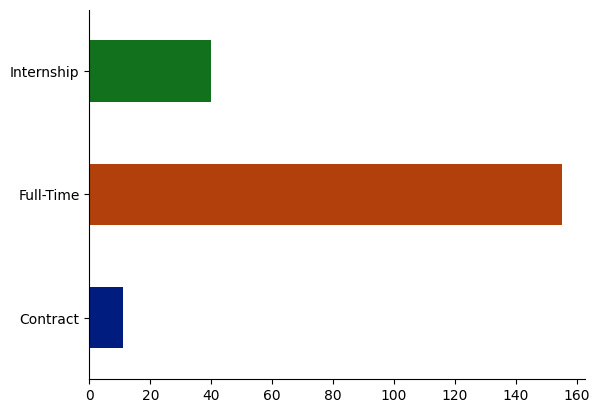

In [ ]:
df.groupby('Type').size().plot(kind='barh',color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Applied Through

In [ ]:
df['AppliedThrough']=df['AppliedThrough'].str.lower()
df.loc[df['AppliedThrough'].str.contains('linkedin'),'AppliedThrough'] = 'LinkedIn'
df.loc[df['AppliedThrough'].str.contains('website'),'AppliedThrough'] = 'Official Website'
df.loc[df['AppliedThrough'].str.contains('naukri'),'AppliedThrough'] = 'Naukri.Com'

df['AppliedThrough'] = df['AppliedThrough'].replace(["apna.com"], 'Apna.Com')
df['AppliedThrough'] = df['AppliedThrough'].replace(["indeed"], 'Indeed')
df['AppliedThrough'] = df['AppliedThrough'].replace(["internshala"], 'Internshala')

In [ ]:
df['AppliedThrough'].unique()

array(['Official Website', 'LinkedIn', 'Naukri.Com', 'Internshala',
       'Apna.Com', 'hirist.tech', 'Indeed'], dtype=object)

In [ ]:
df['AppliedThrough'].value_counts()

LinkedIn            118
Official Website     31
Naukri.Com           28
Internshala          21
Indeed                4
Apna.Com              3
hirist.tech           1
Name: AppliedThrough, dtype: int64

Text(0, 0.5, '')

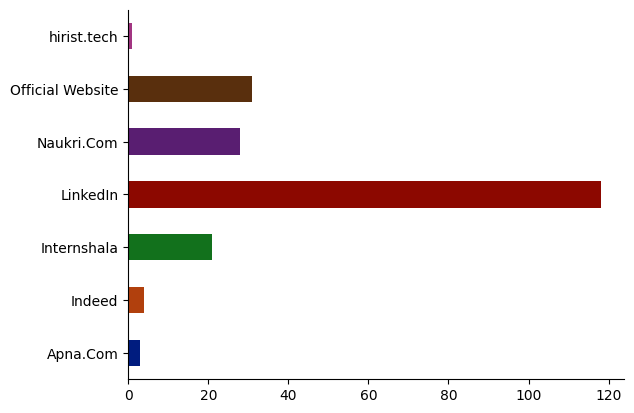

In [ ]:
df.groupby('AppliedThrough').size().plot(kind='barh', color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Location

In [ ]:
df['Location'] = df['Location'].str.lower()

substrings_to_match = ['wfh','remote','not disclosed','work from home']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Remote'


df.loc[df['Location'].str.contains('hyderabad'),'Location'] = 'Hyderabad'

substrings_to_match = ['bangalore','bengaluru']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Bengaluru'

substrings_to_match = ['pune','maharathra']
for substring in substrings_to_match:
  df.loc[df['Location'].str.contains(substring),'Location'] = 'Pune'

df.loc[df['Location'].str.contains('mumbai'),'Location'] = 'Mumbai'
df.loc[df['Location'].str.contains('noida'),'Location'] = 'Noida'
df.loc[df['Location'].str.contains('delhi'),'Location'] = 'Delhi/NCR'
df['Location'] = df['Location'].str.upper()



In [ ]:
df['Location'].unique()

array(['BENGALURU', 'CHENNAI', 'REMOTE', 'HYDERABAD', 'GURUGRAM',
       'MUMBAI', 'PUNE', 'NOIDA', 'DELHI/NCR', 'KOCHI'], dtype=object)

In [ ]:
df['Location'].value_counts()

REMOTE       86
BENGALURU    48
CHENNAI      17
GURUGRAM     14
PUNE         10
HYDERABAD     9
MUMBAI        9
NOIDA         7
DELHI/NCR     5
KOCHI         1
Name: Location, dtype: int64

Text(0, 0.5, '')

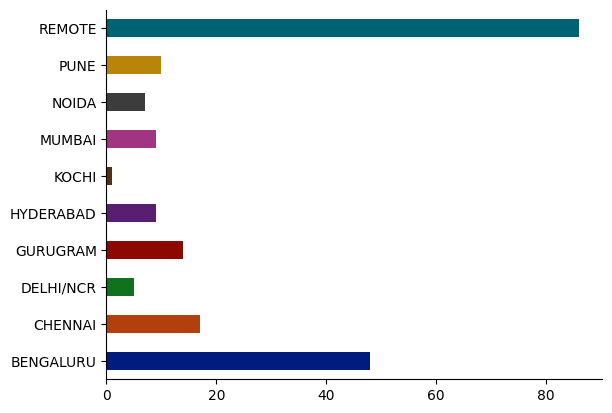

In [ ]:
df.groupby('Location').size().plot(kind='barh',color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Month Applied

**Note:** Run the code only once, as the value will be replaced by the month name, causing an error if run again. To avoid this, execute the code either once or rerun the entire code from scratch.

In [ ]:
import calendar
df['month'] = df['month'].astype('int32')
df['month'] = df['month'].map(lambda i: calendar.month_name[i]) # Replacing with month name

Text(0, 0.5, '')

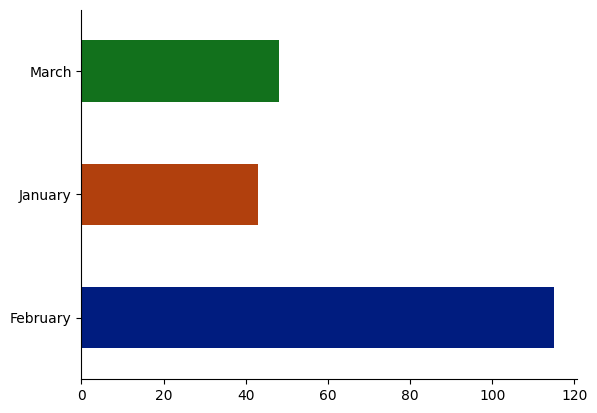

In [ ]:
df.groupby('month').size().plot(kind='barh',color=sns.color_palette('dark'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Job Role - Type

Text(0, 0.5, '')

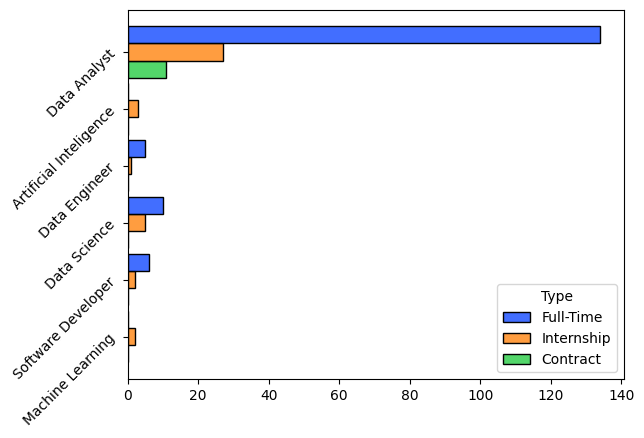

In [ ]:
sns.histplot(data=df, y='Job_Role', hue='Type', multiple='dodge', shrink=0.9, palette='bright')
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')


## Job Role - Applied Through

Text(0, 0.5, '')

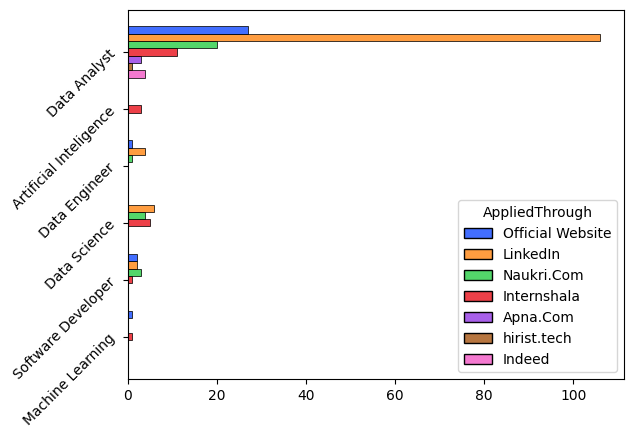

In [ ]:
sns.histplot(data=df, y='Job_Role', hue='AppliedThrough', multiple='dodge', shrink=.9, palette='bright')
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Job Role - Location

Text(0, 0.5, '')

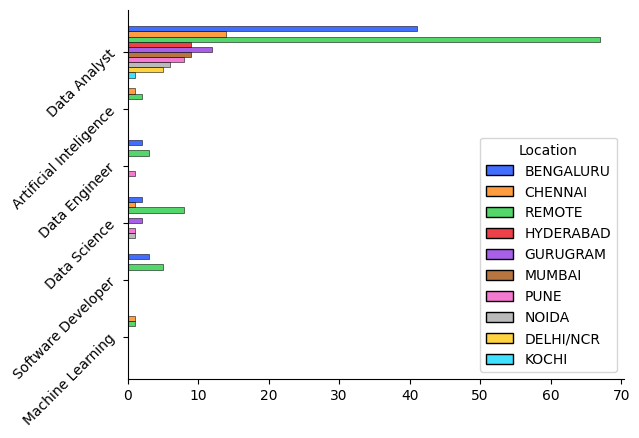

In [ ]:
sns.histplot(data=df, y='Job_Role', hue='Location', multiple='dodge', shrink=.9, palette='bright')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

## Job Role - Month Applied on

Text(0, 0.5, '')

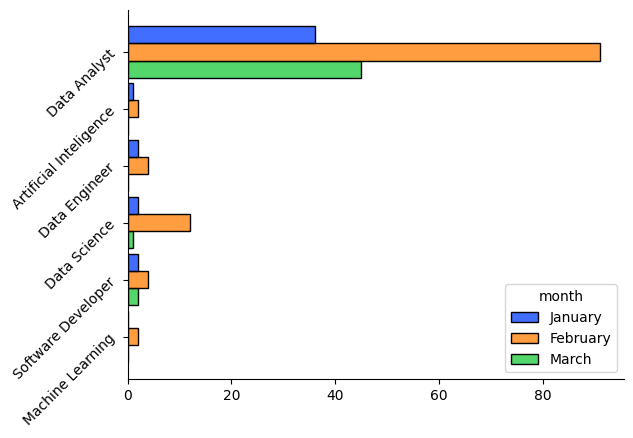

In [ ]:
sns.histplot(data=df, y='Job_Role', hue='month', multiple='dodge', shrink=.9, palette='bright')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.yticks(rotation=45, ha='right')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

# Important Parameters Analysis:


### Top 5 applied companies

In [ ]:
df['CompanyName'].value_counts().head()

Innometrics Solutions    4
BayOne Solutions         4
Rekruton Technologies    4
Elite Met Solutions      3
Bytical                  2
Name: CompanyName, dtype: int64

### Most applied Job Role

In [ ]:
df['Job_Role'].value_counts().head(1)

Data Analyst    172
Name: Job_Role, dtype: int64

### Top 3 Job Location

In [ ]:
df['Location'].value_counts().head(3)

REMOTE       86
BENGALURU    48
CHENNAI      17
Name: Location, dtype: int64

### Most Applied Job Type

In [ ]:
df['Type'].value_counts().head(1)

Full-Time    155
Name: Type, dtype: int64

### Most Job Applied in Month of?

In [ ]:
df['month'].value_counts().head(1)

February    115
Name: month, dtype: int64

### Top 3 plateform job applied through?

In [ ]:
df['AppliedThrough'].value_counts().head(3)

LinkedIn            118
Official Website     31
Naukri.Com           28
Name: AppliedThrough, dtype: int64

Data Download link -
https://docs.google.com/spreadsheets/d/e/2PACX-1vSWTMzJIyLHt6dW9G3L1DZw36LbpXSH9dX3qmvYP7tAggkMANsLFEcMo6lWDZrwzyb3nJtLbcxYWJmR/pub?output=csv

